**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Mentoría MUMUKI
## **"Predicción de deserción en una plataforma educativa para aprender a programar".**

### Mentor

- Bulgarelli, Franco Leonardo

### Integrantes

- Finzi, Nadia
- Gherra C., Estefanía Inés
- Primo, Eugenia


## **NOTA: ESTE ARCHIVO CONTIENE EL DETALLE DE LA NARRACIÓN DEL VIDEO. NO SE DEBE EJECUTAR EL CÓDIGO YA QUE ES UNA SELECCIÓN AISLADA DE LAS CONCLUSIONES Y GRÁFICOS MÁS RELEVANTES DEL ARCHIVO "Mumuki_Entrega_2".**

# Introducción
Descripción de proyecto: Mumuki es una plataforma educativa de programación. 

Nuestro objetivo general es comenzar con una descripción del lote de datos, para luego encontrar métricas que nos permitan, al final de la mentoría, llegar a predecir la deserción de los estudiantes.

### 1 - ¿Qué tamaño tiene el data set y cuáles son sus variables?

In [ ]:
#@title
print("Tamaño del dataset (filas, columnas):", df_submissions_0.shape)

Tamaño del dataset (filas, columnas): (47183, 13)


In [ ]:
#@title
print( "Las", len(df_submissions_0.columns), "variables originales del dataset son: ", list(df_submissions_0.columns))

Las 13 variables originales del dataset son:  ['exercise_eid', 'exercise_name', 'expectation_results', 'feedback', 'guide_slug', 'result', 'sid', 'student_uid', 'submission_content', 'submission_created_at', 'submission_status', 'submissions_count', 'test_results']


Cada fila del dataset representa un envío de solución, de un estudiante, para un determinado ejercicio de la plataforma. 

In [ ]:
#@title
# Primeras filas del dataset 
df_submissions_0.head(3)

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


### 2 - Descripción general

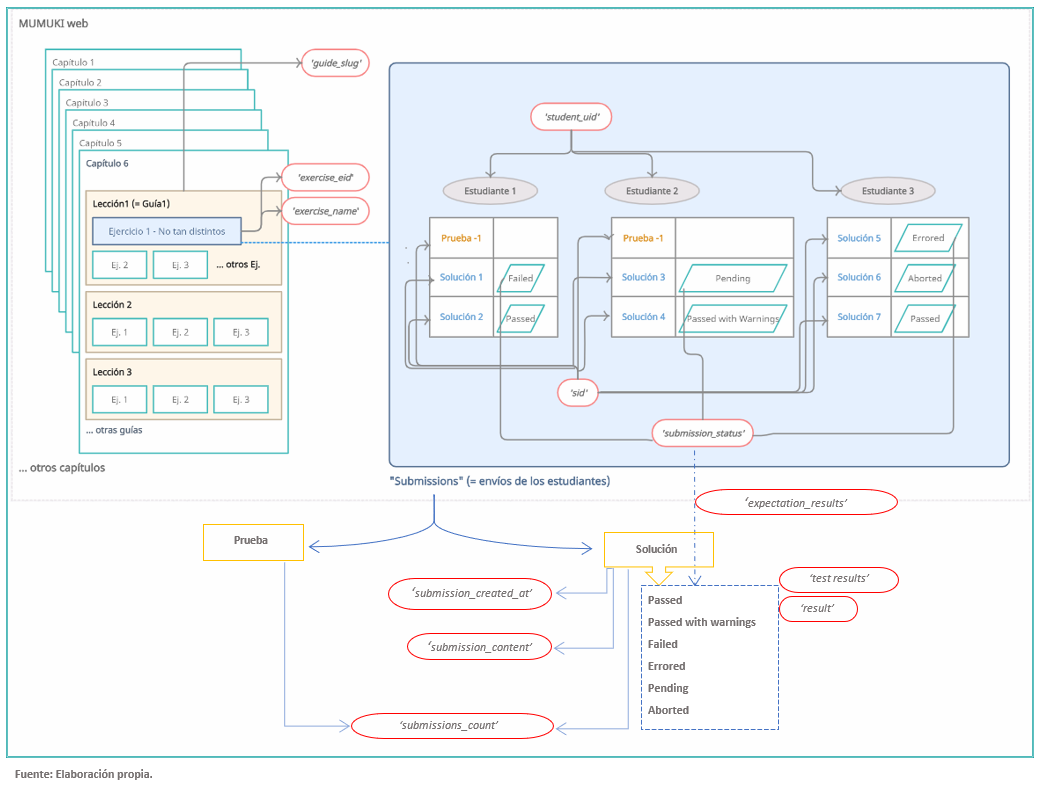

En la imagen anterior representamos mediante flechas y formas las relaciones teóricas entre las variables, y detallamos las categorías de algunas de ellas. 

En círculos señalamos el nombre original de cada una de las variables del dataset.

Observamos que la mayoría de las variables (columnas) del dataframe estaban cargadas como string, es decir, se pueden trabajar como categóricas nominales (u ordinales según el caso)

Entre las que tienen números, sólo `'submissions_count'` y `'submission_created_at'` son realmente numéricas  (discreta y continua, respectivamente) desde el punto de vista estadístico y empírico.

# ¿Qué hicimos?

## 1 - Limpieza y transformaciones

In [ ]:
#--------------------------------------------------#
# CURACIÓN POR ANÁLISIS DE VARIABLES ORIGINALES
#--------------------------------------------------#
#TRANSFORMACIÓN DE LAS VARIABLES RELACIONADAS CON EJERCICIOS: CREACIÓN DE 'exercise_new_id'   
  # Corrección de nombres
df_submissions_0["exercise_name"] = np.where(df_submissions_0["exercise_name"] == 'Más booleanos', 'El retorno del booleano' , df_submissions_0["exercise_name"])
df_submissions_0["exercise_name"] = np.where(df_submissions_0["exercise_name"] == 'PIenso que así es más fácil', 'Pienso que así es más fácil', df_submissions_0["exercise_name"])

  # Eliminamos "Calefones": 
df_submissions_0 = df_submissions_0[df_submissions_0["exercise_name"] != "Calefones"]

_orden_ejer = {"No tan distintos": 1, "Funciones, declaración": 2, "Funciones, uso": 3, "Probando funciones": 4, "Haciendo cuentas": 5, "Poniendo topes": 6, "¿Es par?": 7, "Libros de la buena memoria": 8, "Booleanos": 9, "Palabras, sólo palabras": 10, "Operando strings": 11, "¡GRITAR!": 12, "¿Y qué tal si...?":13, "¿De qué signo sos?": 14, "El retorno del booleano": 15, "Los premios": 16, "Tipos de datos": 17, "Datos de todo tipo": 18, 
          "Comprando Hardware": 19, "¿Me conviene?": 20, "Triangulos": 21, "Cuadrados": 22, "¿Está afinado?": 23, "¿Está cerca?": 24, "Cartelitos": 25, "Más Cartelitos": 26, "Cartelitos óptimos": 27, "Cara o ceca": 28, "¡Envido!": 29, "¡Quiero retruco!": 30, "¡Quiero vale cuatro!": 31,
          "¿Y el tablero?": 32, "Impresión por pantalla": 33, "Martin Fierro": 34, "¿Y los procedimientos?": 35, "¿Y el program?": 36, "Conversiones": 37, "El círculo de la vida": 38, "Pienso que así es más fácil": 39, "Esto no tiene valor": 40, "Variables globales": 41, "Volviéndonos ricos": 42, "¿Y esto cuánto vale?": 43}

  # Mapeo del nombre de los ejercicios con su correspondiente orden dentro de la guía:
df_submissions_0["exercise_new_id"] = df_submissions_0["exercise_name"].map(_orden_ejer)
df_submissions_0["exercise_new_id"] = df_submissions_0["exercise_new_id"].apply(int)

  # Eliminamos la columna del viejo id ya que no sera utilizada de aqui en adelante
df_submissions_0 = df_submissions_0.drop("exercise_eid", axis = 1)

#--------------------------------------------------#
#ELIMINACIÓN DE VARIABLES IRRELEVANTES
df_submissions_0 = df_submissions_0.drop("feedback", axis = 1)

#--------------------------------------------------#
#CONVERSIÓN DE TIPO DE DATO
df_submissions_0["submission_created_at"] = pd.to_datetime(df_submissions_0['submission_created_at'])

#--------------------------------------------------#
#TRATAMIENTO DE CASOS ATÍPICOS Y NULOS
  # Reemplazamos las listas vacías en test_results por NaN's
df_submissions_0["test_results"] = df_submissions_0.test_results.replace("[]", np.nan)

  # Corregimos un outlier (failed que no compilaba y debería ser errored) a partir de result
df_submissions_0["submission_status"] = np.where((df_submissions_0.submission_status == "failed") & (df_submissions_0.result.notna()) , "errored", df_submissions_0.submission_status)

#--------------------------------------------------#
# CURACIÓN POR ANÁLISIS DE MÉTRICAS
#--------------------------------------------------#
#FILTRO DE REGISTROS (FILAS) ATÍPICOS
  # Se filtran (excluyen por el momento) las pruebas: 
df_submissions = df_submissions_0[df_submissions_0["sid"] != -1]

  # Se filtran (excluyen por el momento) status pending y aborted:
df_submissions = df_submissions[~df_submissions["submission_status"].isin(["pending", "aborted"])]

  # Se filtran a estudiantes que tuvieron un único envío o son inválidos (por definición o porque su período de trabajo es mayor a un cuatrimestre):
df_submissions = df_submissions[~df_submissions["student_uid"].isin([75, 142, 361, 97, -1])]

#TRANSFORMACIÓN DE LAS VARIABLES RELACIONADAS CON TIEMPO: CREACIÓN DE 'año', 'cuatrimestre' y 'dia'
  # Obtenemos el periodo al que pertenecen l@s estudiantes para poder identificar los cursos: 
      # Creamos una columna que sólo indique el año: 
df_submissions["año"] = df_submissions["submission_created_at"].dt.year

      # Creamos una columna que sólo indique el cuatrimestre: 
df_submissions["cuatrimestre"] = np.where(df_submissions["submission_created_at"].dt.month.isin([ 5,  6,  7, 8]), "2 cuatr.","3 cuatr.")

      # Creamos una columna que sólo indique el día:
dias = {0: "1-Lunes", 1: "2-Martes", 2: "3-Miércoles", 3: "4-Jueves", 4: "5-Viernes", 5: "6-Sábado", 6: "7-Domingo"}
df_submissions["dia"] = df_submissions["submission_created_at"].dt.dayofweek
df_submissions["dia"].replace(dias, inplace =True)


## 2 - Métricas: generación y análisis

Como en el dataframe no contábamos con etiquetas que indicaran si los estudiantes desertaron o no (siendo este nuestro objetivo principal), debíamos construirlas. 

Para esto, analizamos y definimos las siguientes métricas, con las que pudimos clasificar a los estudiantes como desertores (1) o no (0):
1. Cantidad de ejercicios resueltos por persona.
2. Tiempo promedio (en segundos) invertido por ejercicio por persona.
3. Cantidad de intentos fallidos por persona.

Dentro del proceso de dicha definición de métricas, realizamos varios análisis partiendo de las métricas definidas en la entrega 1, las cuales perfeccionamos para reflejar realmente el objetivo de deserción en la plataforma. 

*Por ejemplo, en el caso de la métrica 1, se añadió información sobre ejercicios fallidos y ejercicios totales por persona.*

*En el caso de la métrica 2, inicialmente habíamos pensado en trabajar con los envíos correctos, pero decidimos calcular el tiempo promedio para cualquier `status` de envío.*

*En cambio, en la métrica 3, la perfeccionamos focalizando el análisis solo en los intentos fallidos por persona.*

Toda este proceso se resumió en un dataframe nuevo, estructurado con estas métricas por persona. A partir de aquí, se lo utilizará para los sucesivos análisis y conclusiones.

In [ ]:
df_condiciones

,student_uid,ejercicios_totales,ejercicios_fallidos,ejercicios_resueltos,cond_cant_ejer_resueltos,intentos_totales,intentos_incorrectos,intentos_correctos,intentos_fallidos_max_ejer,cond_fallos_ejer,tiempo_total_invertido,tiempo_prom_por_ej_correcto,tiempo_prom_por_ejercicio,cond_tiempo_prom_ejer
0,76,31,1.0,30.0,0.0,62,30.0,32.0,7.0,0.0,8514.0,283.800000,274.645161,0
1,77,34,0.0,34.0,0.0,127,89.0,38.0,30.0,1.0,11682.0,343.588235,343.588235,0
2,78,6,2.0,4.0,1.0,66,62.0,4.0,37.0,1.0,7043.0,1760.750000,1173.833333,1
3,79,19,1.0,18.0,1.0,65,47.0,18.0,10.0,1.0,4464.0,248.000000,234.947368,0
4,80,14,3.0,11.0,1.0,103,92.0,11.0,26.0,1.0,7093.0,644.818182,506.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,359,13,1.0,12.0,1.0,31,19.0,12.0,6.0,0.0,4322.0,360.166667,332.461538,0
277,363,3,2.0,1.0,1.0,19,18.0,1.0,12.0,1.0,1753.0,1753.000000,584.333333,1
278,131,1,1.0,0.0,0.0,6,6.0,NaN,6.0,0.0,105.0,inf,105.000000,0
279,143,1,1.0,0.0,0.0,3,3.0,NaN,3.0,0.0,107.0,inf,107.000000,0



Mostramos a continuación algunos gráficos seleccionados del proceso de análisis, que nos permitieron ir estableciendo las reglas de decisión para cada métrica.

**Métrica 1: Cantidad de ejercicios resueltos por persona.**

Regla de decisión utilizada: si un estudiante resolvió menos del cuantil 25% de ejercicios (17 ejercicios), se considera que desertó. Este valor es un poco menos de la mitad del recorrido. 

La variable que concentra esta información en las etiquetas 1 (desertó) y 0 (no desertó) es: `cond_cant_ejer_resueltos`

Debajo se observa el boxplot de dicha variable que refleja el cuantil 25% y su distribución entre todos los estudiantes.

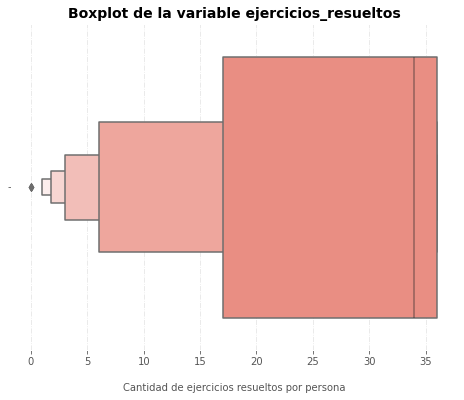

In [ ]:
#@title
# Boxplot de la columna "ejercicios_resueltos":
graficar_boxplot(df_condiciones, "ejercicios_resueltos", "", "Cantidad de ejercicios resueltos por persona", "")

**Métrica 2: Tiempo promedio invertido por ejercicio por persona.**

Regla de decisión utilizada: si un estudiante invirtió más del cuantil 75% del tiempo promedio en determinado ejercicio (equivalente a casi 10 minutos), se considera que desertó.

La variable que concentra esta información en las etiquetas 1 (desertó) y 0 (no desertó) es: `cond_tiempo_prom_ejer`


---

Observación: Definir esta regla de decisión requirió un análisis más profundo que considerar el análisis univariado de la métrica en sí (boxplot). 

Es decir, pensamos inicialmente que quizá una persona que invierta más tiempo promedio por ejercicio, podría frustrarse y desertar. Sin embargo, es relevante considerar que dedicar más tiempo por ejercicio y fallar en algunos de ellos, puede implicar un proceso de aprendizaje que no lo lleve a desertar (y logra ejercicios correctos).    

Profundizamos el análisis cruzándola con otras métricas para llegar a un criterio de deserción para la variable tiempo promedio invertido.

En el siguiente gráfico hacemos un primer paneo del tiempo total que cada estudiante invirtió en cada ejercicio.

Se observa que:
* hay ejercicios que en promedio requieren más tiempo de dedicación que otros.
* hay estudiantes que registran tiempo atípicos para ciertos ejercicios.

Tiempo invertido por estudiante en cada ejercicio


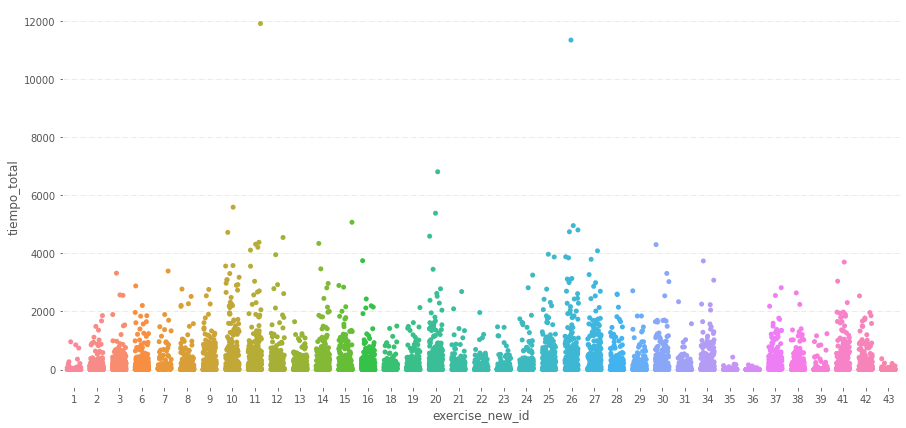

In [ ]:
#@title
plt.subplots(figsize=(15,7))
sns.stripplot(x=tiempo_total_por_ejercicio_2['exercise_new_id'], y=tiempo_total_por_ejercicio_2['tiempo_total'], jitter=0.3)
print("Tiempo invertido por estudiante en cada ejercicio")

En el siguiente gráfico se observa la distribución entre los estudiantes del tiempo promedio invertido por ejercicio.

Se observa que el 50% de los estudiantes invirtió hasta 7 minutos por ejercicio. 

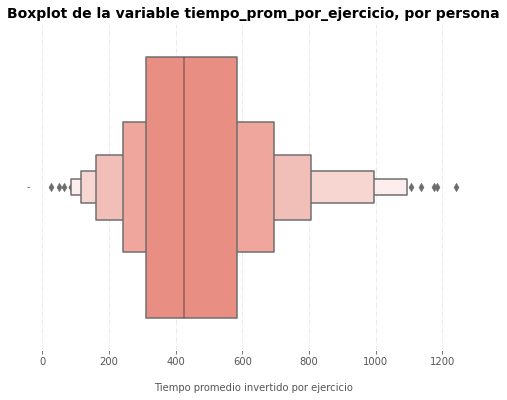

In [ ]:
#@title
graficar_boxplot(df_condiciones, "tiempo_prom_por_ejercicio", ", por persona", "Tiempo promedio invertido por ejercicio", "")

Como del gráfico anterior no podemos concluir el criterio de deserción para dicha métrica, optamos por cruzarla con la métrica de condición de fallos por ejercicio (métrica desarrollada en la siguiente sección). Esto se visualiza en los colores celeste y naranja de los boxplot. 

Además, para poder arribar a mejores conclusiones, incorporamos información sobre el tiempo promedio por ejercicio correcto. Esto se visualiza en las dos variables que contiene el eje *y*.

En el primer par de boxplot vemos lo que intuitivamente creíamos al inicio: mayor tiempo invertido por ejercicio implicaba cierta frustración y deserción (boxplot naranja), mientras que menor tiempo, menor deserción (boxplot celeste).

Sin embargo, cuando analizamos el promedio de tiempo invertido considerando los ejercicios correctos (segundo par de boxplot), vemos que la distribución para las personas que, según la métrica de fallos no desertaron, se superpone entre los cuantiles 50 y 75 con la distribución de quienes sí desertaron según la misma métrica. Es decir, no hay una diferencia tan clara en el tiempo invertido para resolver correctamente un ejercicio entre las personas que tienen mayor cantidad de intentos fallidos y las que tienen menos.
 
En síntesis, si bien no hay un criterio claro de deserción debido a esta superposición, viendo los 4 boxplots podemos plantear como una primera regla que desertan los estudiantes que invierten más del cuantil 75% de tiempo promedio por ejercicio. 

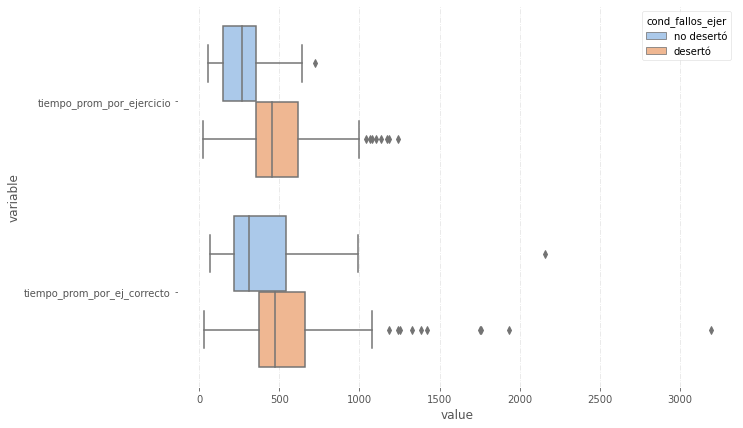

In [ ]:
#@title
plt.figure(figsize=(10,7))
sns.boxplot(y="variable", x="value", data=prueba, hue='cond_fallos_ejer', palette='pastel') 

A riesgo de que lo que estamos concluyendo esté afectado por una dependencia entre las métricas, en un análisis posterior se incluirá información respecto a la instancia o ejercicio al que llegó cada estudiante en el recorrido total. De esta manera, pretenderíamos intuir y definir una métrica combinada de deserción, que contemple todos estos aspectos que se interrelacionan.

**Métrica 3: Cantidad de intentos fallidos por persona por ejercicio**

Regla de decisión utilizada: si un estudiante tuvo más del cuantil 75% de intentos fallidos en un ejercicio (más de 30), se considera que desertó. 

La variable que concentra esta información en las etiquetas 1 (desertó) y 0 (no desertó) es: `cond_fallos_ejer`

Debajo se observa el boxplot de dicha variable que refleja el cuantil 75% y su distribución entre todos los estudiantes.

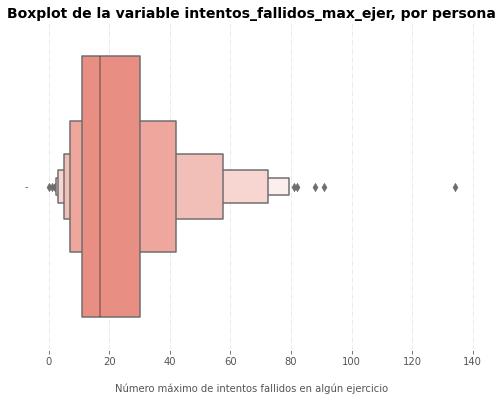

In [ ]:
#@title
graficar_boxplot(df_condiciones, 'intentos_fallidos_max_ejer', ", por persona", "Número máximo de intentos fallidos en algún ejercicio", "" )

De forma similar al análisis de la métrica 2, es necesario incluir más información respecto a la instancia o ejercicio al que llegó cada estudiante para poder definir en forma acabada el criterio de deserción.

## 3 - Análisis de posibles correlaciones

Dado que en las métricas anteriores concluimos que era necesario incorporar más información para definir un criterio acabado y combinado de deserción, mostramos a continuación algunos gráficos en los que relacionamos las métricas generadas.

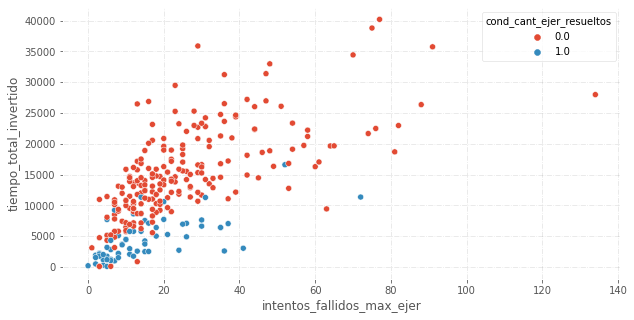

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='intentos_fallidos_max_ejer', y='tiempo_total_invertido', hue = 'cond_cant_ejer_resueltos', data=df_condiciones)

Aquí observamos una relación positiva entre el tiempo total invertido y la cantidad máxima de intentos fallidos en algún ejercicio. Esto es coherente con lo esperado en tanto un estudiante que intenta y falla más veces, invirtió más tiempo en enviar soluciones.   

Pero, por otro lado, en el gráfico se ve que los estudiantes que avanzaron más en el recorrido (rojos) tendrían como un proceso de aprendizaje en el error, ya que a igual cantidad de intentos fallidos máxima dedicaron más tiempo para resolver correctamente el ejercicio.

En el siguiente gráfico, desde otra perspectiva estamos viendo que a los supuestos desertores les llevó más tiempo resolver correctamente los ejercicios.

Lo que no cierra es la gran cantidad de estudiantes que, según la métrica de intentos fallidos, fueron clasificados como desertores, pero que en realidad completaron todos los ejercicios. 

Por tanto, esta métrica está penalizando a los que fallan mucho y, en consecuencia, no podríamos confiar en ella por sí sola. 

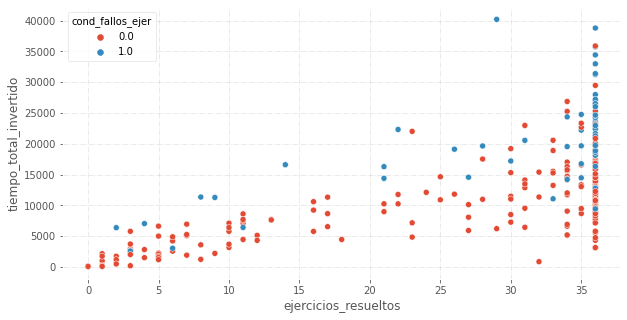

In [ ]:
#@title
plt.figure(figsize=(10,5))
sns.scatterplot(y='tiempo_total_invertido', x='ejercicios_resueltos', hue = 'cond_fallos_ejer', data=df_condiciones)

Considerando lo visto en ambos gráficos, podría surgir una nueva métrica que mida la velocidad con la que falla el estudiante. 



Analizados estos gráficos, llegamos a una conclusión pensando en dos etapas:
1. Si nos concentramos en determinada cantidad máxima de intentos fallidos, vemos que los estudiantes que completaron el recorrido dedicaron mucho más tiempo (rojos) que los que no lo completaron (azules).
2. Si consideramos lo mismo pero calculando ahora la cantidad máxima de intentos fallidos por unidad de tiempo, vemos que los azules están fallando más por unidad de tiempo. Esto podría implicar que quizás no están internalizando los conocimientos de los ejercicios al realizar envíos fallidos con mayor velocidad. 


# Para continuar trabajando

En la etapa siguiente, vamos a desagregar los análisis y métricas por persona y por ejercicio para incorporar la dimensión del recorrido en la plataforma.

En el gráfico siguiente mostramos un primer resultado que refleja el ejercicio más avanzado hasta el cual llegó cada estudiante.

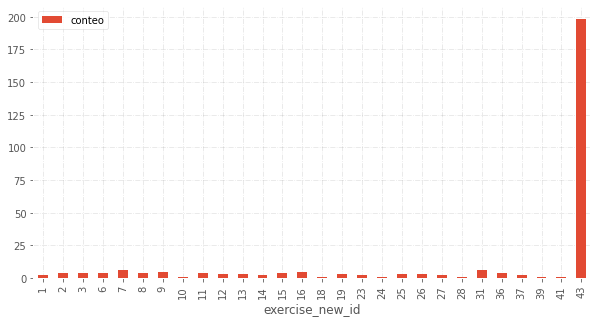

In [ ]:
#@title
estudiantes_con_ej_max.sort_values("exercise_new_id").plot.bar(x = "exercise_new_id", y = "conteo", figsize = (10, 5))

Luego de algunas transformaciones, obtuvimos el siguiente dataframe por estudiante y ejercicio, del cual derivaremos las métricas y gráficos que nos permitirán realizar un análisis más profundo.


In [ ]:
estudiante_por_ejercicio

,student_uid,exercise_new_id,ultimo_estado,intentos_totales,intentos_correctos,intentos_incorrectos,tiempo_total,fecha_primer_correcto,fecha_ultimo_incorrecto
0,76,2,passed,1,1.0,NaN,0.0,2019-08-30 13:17:17.700,NaT
1,76,3,passed,2,1.0,1.0,0.0,2019-09-10 20:00:32.156,2019-08-30 13:40:26.023
2,76,6,passed,1,1.0,NaN,0.0,2019-09-23 12:24:41.746,NaT
3,76,7,passed,2,1.0,1.0,30.0,2019-09-10 20:09:15.049,2019-09-10 20:08:45.875
4,76,9,passed,5,1.0,4.0,915.0,2019-09-23 13:05:45.340,2019-09-23 13:04:41.529
...,...,...,...,...,...,...,...,...,...
7874,359,43,passed,1,1.0,NaN,0.0,2020-05-29 02:25:47.078,NaT
7875,362,21,failed,3,NaN,3.0,87.0,NaT,2019-10-17 14:36:54.224
7876,363,25,passed,3,1.0,2.0,61.0,2020-10-06 14:17:51.060,2020-10-06 14:17:11.150
7877,363,26,errored,4,NaN,4.0,151.0,NaT,2020-10-06 14:27:26.752
